<a href="https://colab.research.google.com/github/jhonelpe/proyecto_aprendiendo_como_funcionan_las_ai/blob/main/clase2_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
import tensorflow_datasets as tfds

datos, metadatos = tfds.load("fashion_mnist", as_supervised=True, with_info=True)


In [2]:
metadatos


tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_path=PosixGPath('/tmp/tmp9dqpsuzqtfds'),
    file_format=tfrecord,
    download_size=29.45 MiB,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao a

In [5]:
datos_entrenamiento, datos_pruebas = datos["train"], datos["test"]

In [4]:
nombres_clases = metadatos.features["label"].names
nombres_clases

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
# combertir los datos que van de (1, 255) a (1, 0)
def co4rmalizacion (imagenes, etiquetas):
  imagenes = tf.cast(imagenes, tf.float32)
  imagenes /=255
  return imagenes, etiquetas

# normalizar los datos pasandola por la funcion ca4rmalizacion
datos_entrenamiento =datos_entrenamiento.map(co4rmalizacion)
datos_pruebas = datos_pruebas.map(co4rmalizacion)

# almacenar por cache
datos_entrenamiento =datos_entrenamiento.cache()
datos_pruebas = datos_pruebas.cache()



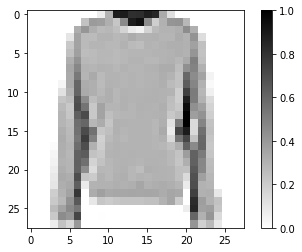

In [7]:
# una prueba para ver como esta clasificando las imagenes 
for imagen, etiqueta in datos_entrenamiento.take(25):
  break
imagen = imagen.numpy().reshape((28,28))

import matplotlib.pyplot as plt

plt.figure()
plt.imshow(imagen, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
# se crea el modelo de redes neuronales la variable flatten como el nombre dice aplana la laas imagenes  no campia en nada le es mas facil al programa trabajar en estas dimensiocnes
modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])

In [9]:
# compilar 
modelo.compile(
    optimizer = "adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ["accuracy"]
)

In [10]:
num_ej_entrenamientos= metadatos.splits["train"].num_examples
nume_ej_prueba = metadatos.splits["test"].num_examples

print(num_ej_entrenamientos, nume_ej_prueba) 

lote = 32

datos_entrenamiento = datos_entrenamiento.repeat().shuffle(num_ej_entrenamientos).batch(lote)
datos_pruebas = datos_pruebas.batch(lote)

import math 
historial = modelo.fit(datos_entrenamiento, epochs=5, steps_per_epoch= math.ceil(num_ej_entrenamientos/lote))


60000 10000
Epoch 1/5
1875/1875 [==============================] - 12s 3ms/step - loss: 0.5320 - accuracy: 0.8136
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3962 - accuracy: 0.8577
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3553 - accuracy: 0.8708
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3274 - accuracy: 0.8799
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3135 - accuracy: 0.8852
